# Introduction

In this project I will analyze and investigate data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ What is the life expectancy in these nations?
+ Has life expectancy increased over time in the six nations?
+ What is the GDP in these nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from chart_studio.plotly import iplot
from  plotly.offline import plot
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

In [140]:
df = pd.read_csv('cereal.csv')
df.columns
df.describe()
df.dtypes
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [100]:
df = df.drop(columns=['mfr', 'type', 'shelf', 'weight']).reset_index()

# Data Inspection

After loading the data and inspecting its' contents, I have determined the following:

+ The data types of all values are represented accurately
+ There are no missing (null) values
+ The dataset is relatively small and the scope is very narrow

# How many calories should breakfast provide?

[NHS Report](https://www.nhs.uk/live-well/eat-well/healthy-breakfast-cereals/) says:

A helpful rule of thumb to maintain a healthy weight is to follow the 400-600-600 approach.

That means having about:

* 400kcal for breakfast
* 600kcal for lunch
* 600kcal for dinner

That leaves you with just enough left over to enjoy a few healthy drinks and snacks throughout the day.

This advice is based on a woman's daily recommended calorie intake of 2,000kcal.


However avoid cereals which has high in sugar, fat or salt

* high in sugar: more than 22.5g of total sugars per 100g
* high in fat: more than 17.5g of fat per 100g
* high in salt: more than 1.5g of salt per 100g

# What are the nutrient levels in these cereals?

We can see from the barplot below that Zimbabwe's life expectancy is much lower and the range in age is much wider than the other countries.

### Ideal Low level for sugar, fat or salt

* low in sugar: 5g of total sugars or less per 100g
* low in fat: 3g of saturated fat or less per 100g
* low in salt: 0.3g of salt or less per 100g

In [112]:
healthy_cereals = df.loc[(df['sugars'] <= 50) & (df['sodium'] <= 3) 
                               & (df['fat'] <= 30)]
    
df['healthy'] = np.where((df['sugars'] <= 5) & (df['sodium'] <= 0.3) 
                               & (df['fat'] <= 3)  
                               &(df['calories'] >= 50), 'yes','no')
df['healthy'].value_counts()


no     70
yes     7
Name: healthy, dtype: int64

In [117]:
healthy_cereals = df.loc[(df['healthy'] == 'yes') | (df['rating'] >= 60)]
healthy_cereals

,index,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups,rating,healthy
0,0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,0.33,68.402973,no
3,3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,0.50,93.704912,no
20,20,Cream of Wheat (Quick),100,3,0,80,1.0,21.0,0,-1,0,1.00,64.533816,no
43,43,Maypo,100,4,1,0,0.0,16.0,3,95,25,1.00,54.850917,yes
54,54,Puffed Rice,50,1,0,0,0.0,13.0,0,15,0,1.00,60.756112,yes
55,55,Puffed Wheat,50,2,0,0,1.0,10.0,0,50,0,1.00,63.005645,yes
57,57,Quaker Oatmeal,100,5,2,0,2.7,-1.0,-1,110,0,0.67,50.828392,yes
63,63,Shredded Wheat,80,2,0,0,3.0,16.0,0,95,0,1.00,68.235885,yes
64,64,Shredded Wheat 'n'Bran,90,3,0,0,4.0,19.0,0,140,0,0.67,74.472949,yes
65,65,Shredded Wheat spoon size,90,3,0,0,3.0,20.0,0,120,0,0.67,72.801787,yes


In [153]:

healthy = healthy_cereals.groupby('name')['rating'].sum().to_frame().reset_index()
cereal_cal = df.groupby('name')['calories'].sum().to_frame().reset_index()
cereal_cal.sort_values(by=['calories'], ascending=False)
cereal_sug = df.groupby('name')['sugars'].sum().to_frame().reset_index()
cereal_sug.sort_values(by=['sugars'], ascending=False)
cereal_fat = df.groupby('name')['fat'].sum().to_frame().reset_index()
cereal_fat.sort_values(by=['fat'], ascending=False)
cereal_carb = df.groupby('name')['carbo'].sum().to_frame().reset_index()
cereal_carb.sort_values(by=['carbo'], ascending=False)
cereal_salt = df.groupby('name')['sodium'].sum().to_frame().reset_index()
cereal_salt.sort_values(by=['sodium'], ascending=False)
cereal_fib = df.groupby('name')['fiber'].sum().to_frame().reset_index()
cereal_fib.sort_values(by=['fiber'], ascending=False)

,name,fiber
3,All-Bran with Extra Fiber,14.0
0,100% Bran,10.0
2,All-Bran,9.0
52,Post Nat. Raisin Bran,6.0
58,Raisin Bran,5.0
...,...,...
31,Golden Grahams,0.0
37,Honey-comb,0.0
40,Kix,0.0
42,Lucky Charms,0.0


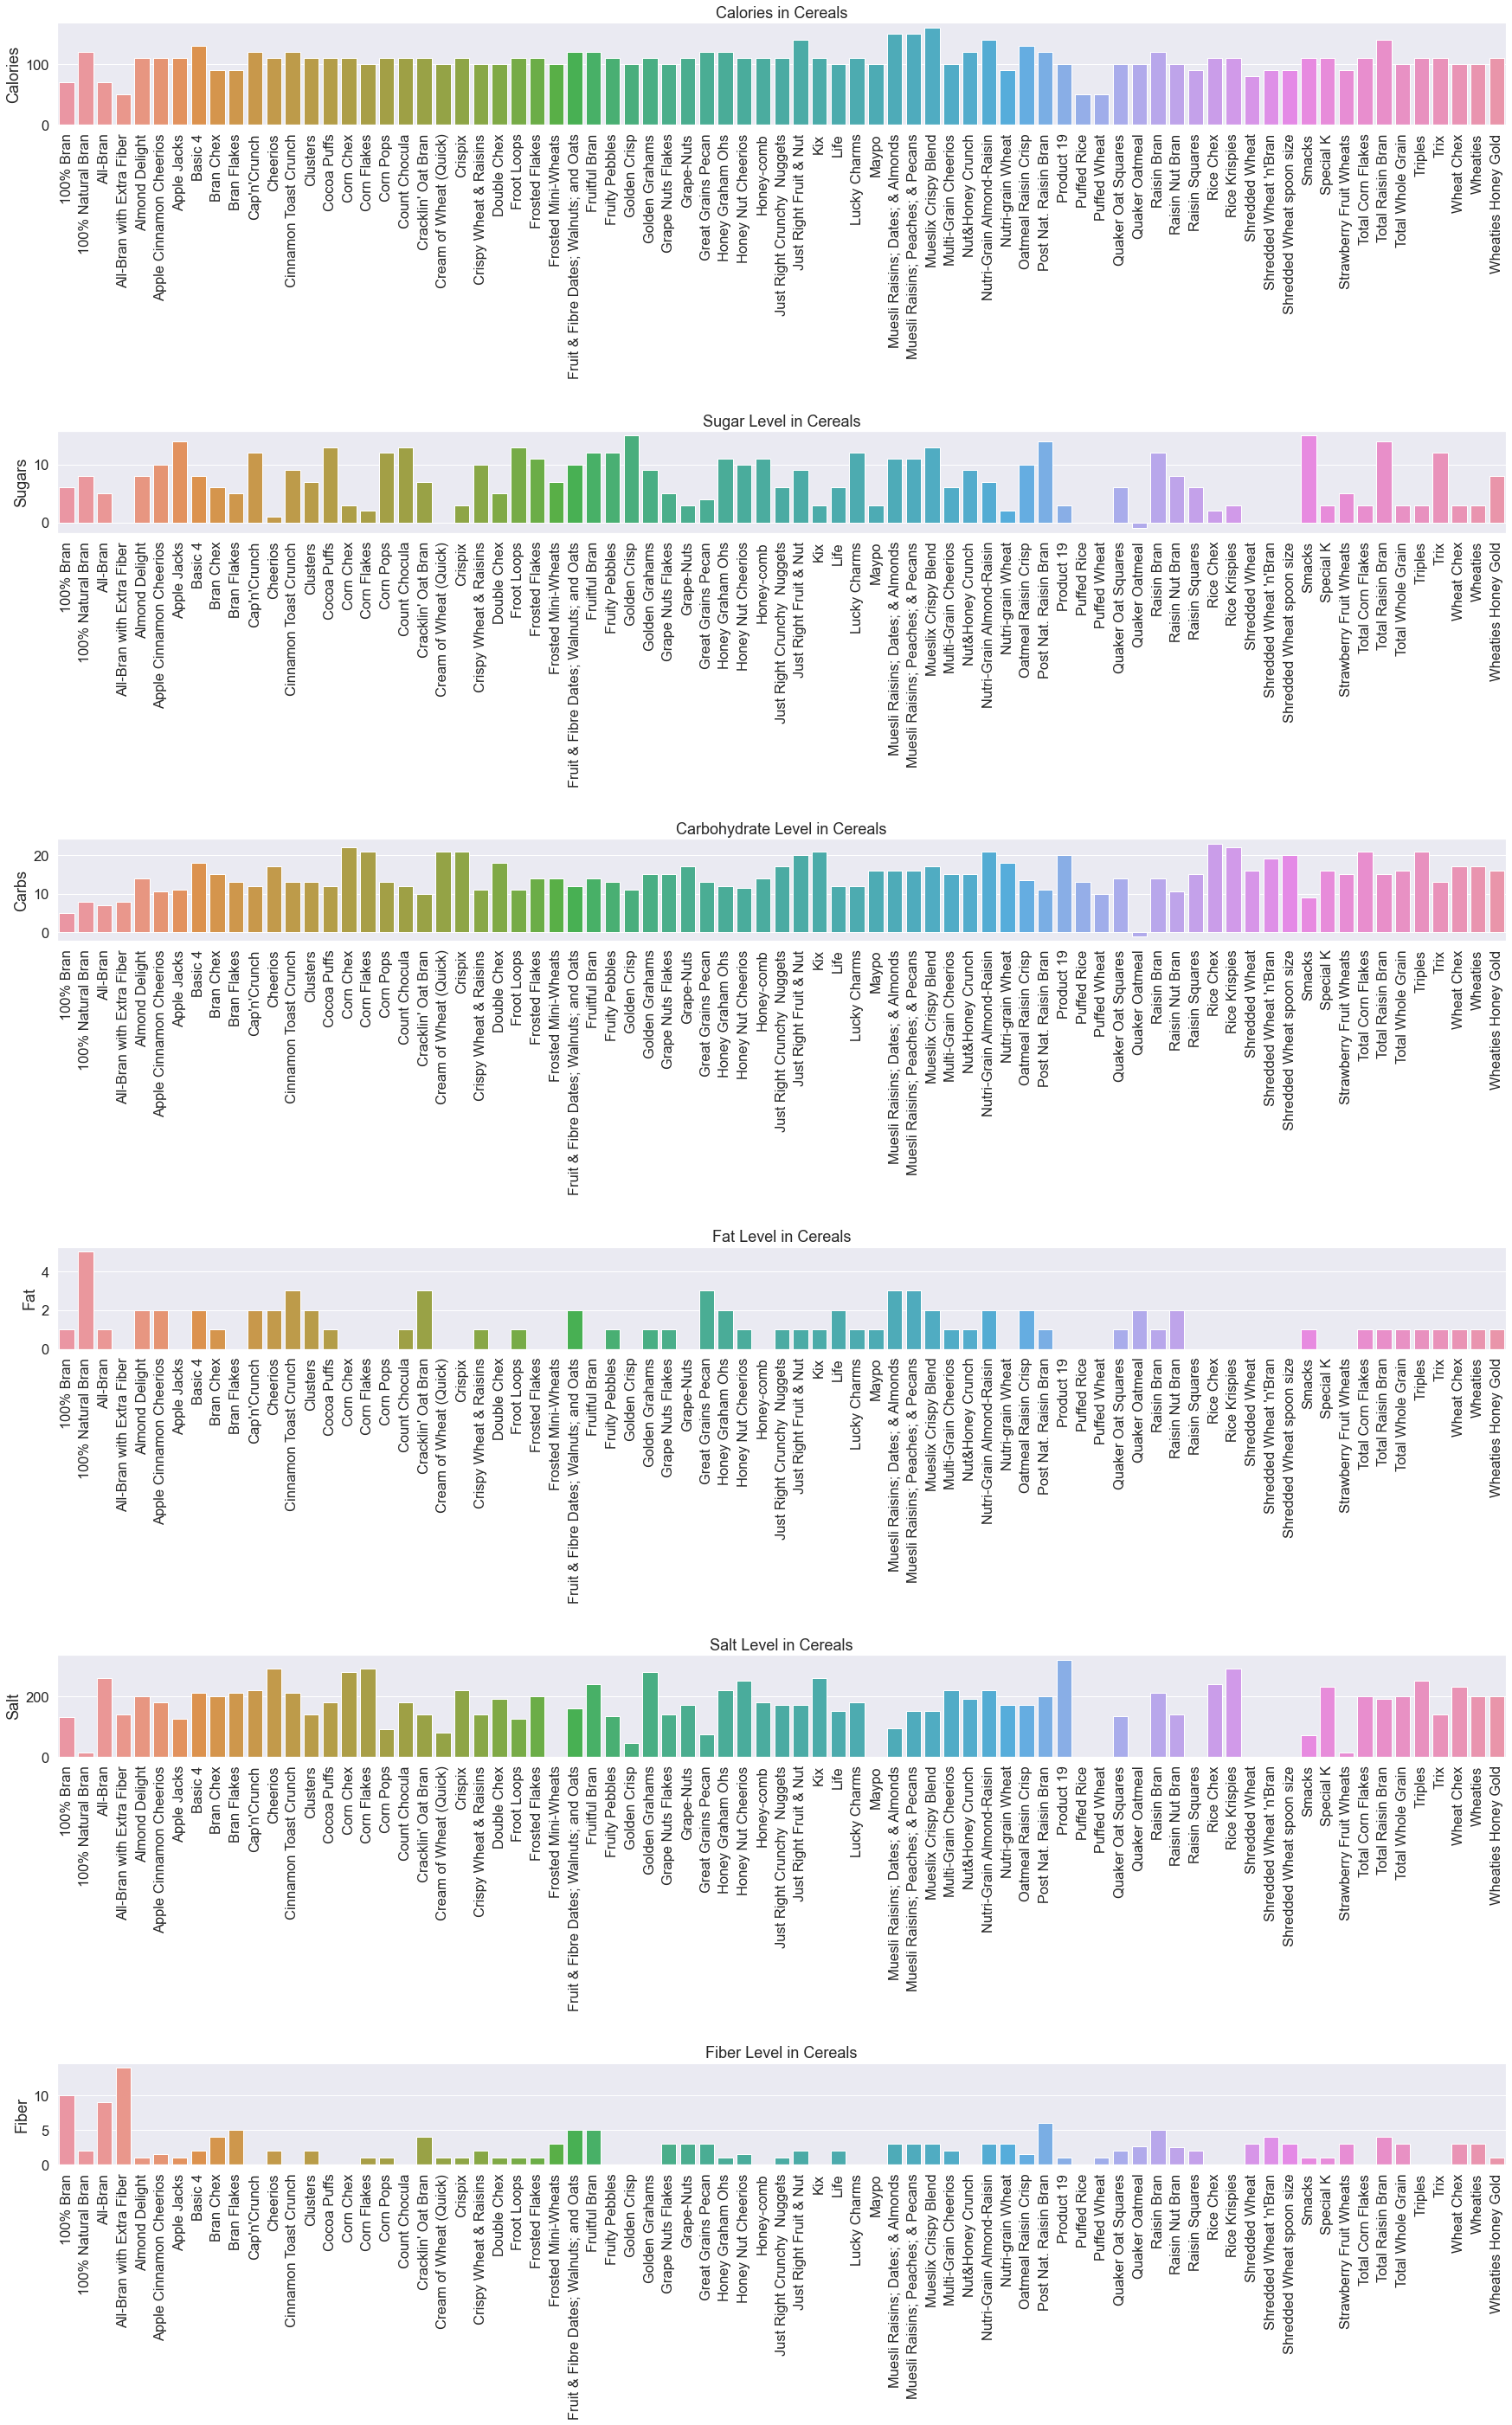

In [149]:
calories = healthy_cereals.groupby('name')['calories'].sum().to_frame().reset_index()
healthy

f, ax = plt.subplots(figsize=(30,25))
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

plt.subplot(611)
ax = sns.barplot(x='name', y='calories', data=cereal_cal)
ax.set_xticklabels(cereal_cal.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Calories')
ax.set_title('Calories in Cereals')

plt.subplot(612)
ax = sns.barplot(x='name', y='sugars', data=cereal_sug)
ax.set_xticklabels(cereal_sug.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Sugars')
ax.set_title('Sugar Level in Cereals')

plt.subplot(613)
ax = sns.barplot(x='name', y='carbo', data=cereal_carb)
ax.set_xticklabels(cereal_carb.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Carbs')
ax.set_title('Carbohydrate Level in Cereals')

plt.subplot(614)
ax = sns.barplot(x='name', y='fat', data=cereal_fat)
ax.set_xticklabels(cereal_fat.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Fat')
ax.set_title('Fat Level in Cereals')

plt.subplot(615)
ax = sns.barplot(x='name', y='sodium', data=cereal_salt)
ax.set_xticklabels(cereal_salt.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Salt')
ax.set_title('Salt Level in Cereals')

plt.subplot(616)
ax = sns.barplot(x='name', y='fiber', data=cereal_fib)
ax.set_xticklabels(cereal_fib.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Fiber')
ax.set_title('Fiber Level in Cereals')

plt.subplots_adjust(hspace=3, top=1.5)
plt.savefig('cal_sug_carb_fat_salt_fiber.png')
plt.show()

# Has the average life expectancy increased over time in the six nations?

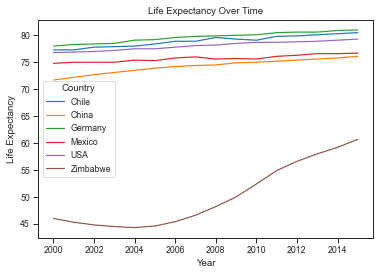

<Figure size 432x288 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

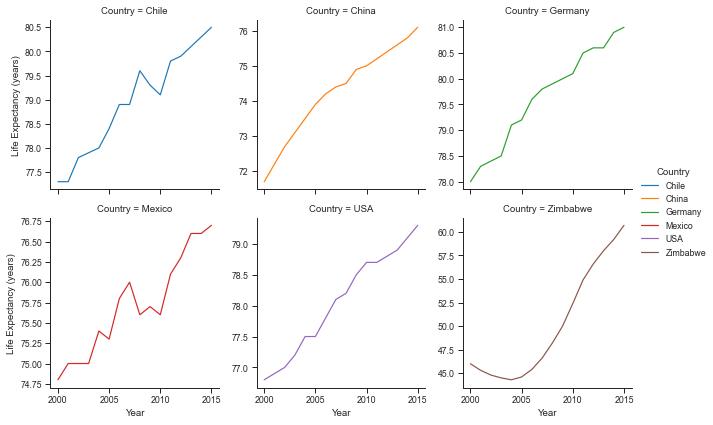

In [ ]:
f, ax = plt.subplots()
sns.lineplot(x='Year', y='Life_Expectancy', data=df, hue='Country')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')
plt.savefig('over_time_combined.png')
plt.show()
plt.clf()

plt.figure(figsize=(15,8))
sns.set_context('paper')

graph_exp = sns.FacetGrid(df, col='Country', col_wrap=3,
                      hue='Country', sharey = False)

graph_exp = (graph_exp.map(sns.lineplot,'Year','Life_Expectancy')
         .add_legend()
         .set_axis_labels('Year','Life Expectancy (years)'))
plt.savefig('exp_over_time.png')

# What is GDP?

The Gross Domestic Product (GDP) is the total of all value added created in an economy. The value added means the value of goods and services that have been produced minus the value of the goods and services needed to produce them, the so called intermediate consumption.

- Source: [What is GDP?](https://ec.europa.eu/eurostat/statistics-explained/index.php/Beginners:GDP_-_What_is_gross_domestic_product_(GDP)%3F)

# What is the GDP in these nations?

In [ ]:

df_avg = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

plt.figure(figsize=(15, 8))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(x='Country', y='GDP', data=df, palette='Set2')
plt.xticks(rotation=30)
plt.ylabel('GDP in Trillions (Dollars)')
plt.title('Range')

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(x='Country', y='GDP', data=df_avg, marker='o')
plt.xticks(rotation=30)
plt.ylabel('')
plt.title('Average')
plt.subplots_adjust(bottom=.21)
plt.savefig('GDP.png')
plt.clf()

<Figure size 1080x576 with 0 Axes>

# Has GDP increased over time in the six nations?

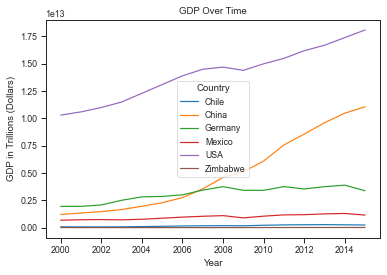

<Figure size 432x288 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

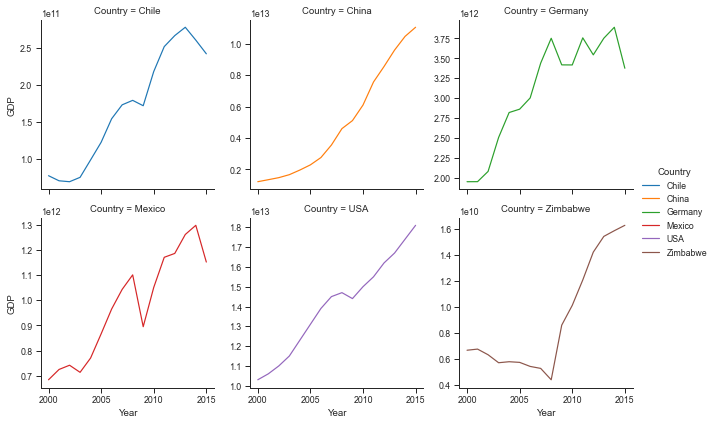

In [ ]:
f, ax = plt.subplots()
sns.set_context('paper')
sns.lineplot(x='Year', y='GDP', data=df, hue='Country')
plt.ylabel('GDP in Trillions (Dollars)')
plt.title('GDP Over Time')
plt.savefig('GDP_over_time_combined.png')
plt.show()
plt.clf()

plt.figure(figsize=(15,8))
sns.set_context('paper')

graph_gdp = sns.FacetGrid(df, col='Country', col_wrap=3,
                      hue='Country', sharey = False)

graph_gdp = (graph_gdp.map(sns.lineplot,'Year','GDP')
         .add_legend()
         .set_axis_labels('Year','GDP'))
plt.savefig('gdp_over_time.png')

# Is there a correlation between GDP and life expectancy of a country?

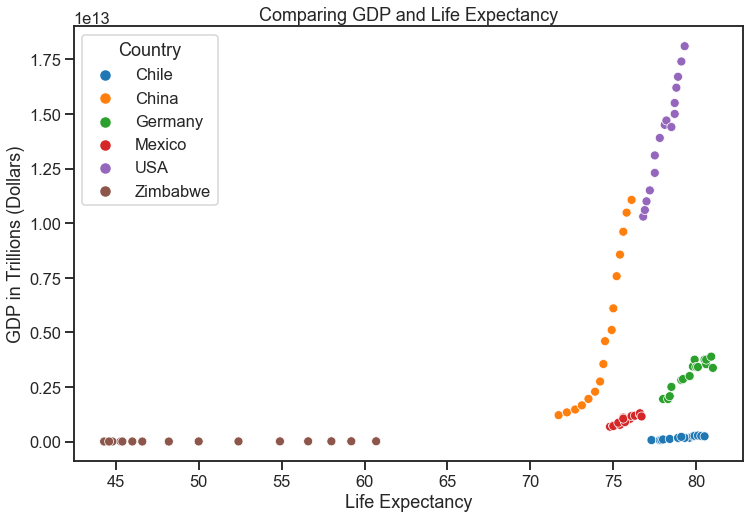

<Figure size 432x288 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

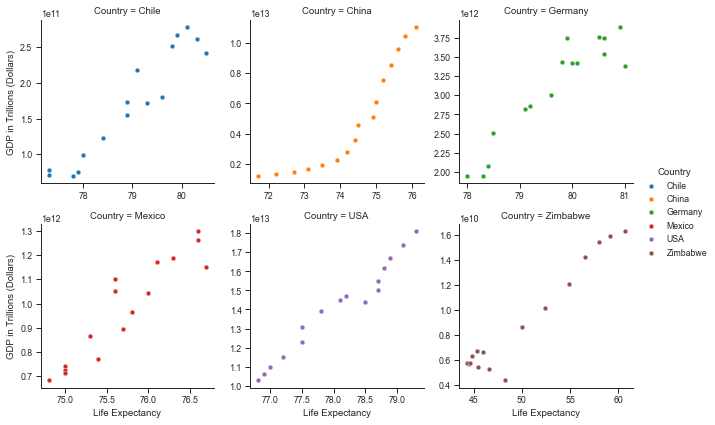

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_context('talk')
sns.scatterplot(x='Life_Expectancy', y='GDP', data=df, hue='Country')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP in Trillions (Dollars)')
plt.title('Comparing GDP and Life Expectancy')
plt.savefig('GDP_Exp_Combined.png')
plt.show()
plt.clf()

plt.figure(figsize=(15,8))
sns.set_context('paper')
graph = sns.FacetGrid(df, col='Country', col_wrap=3,
                      hue = 'Country', sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,'Life_Expectancy', 'GDP')
         .add_legend()
         .set_axis_labels('Life Expectancy', 'GDP in Trillions (Dollars)'));
plt.savefig('GDP_Exp.png')